In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#INPUTS:
#L: list to randomly choose subset from
#k: k sized subset tp pick from array
#OUTPUT:
#subset: the random subset array picked from original list
def rand_subset(L, k):
    s = len(L)
    items = np.linspace(0,s-1,s).astype(int)
    np.random.shuffle(items)
    index = items[:k]
    L = np.array(L)
    subset = L[index]
    return subset

#INPUTS:
# ls: list of items to select from
# stn: array of strength's corresponding to items
# n: top n to return
#OUTPUT:
# select: selection of n most fit items
def selection(ls, stn, n):
    stn = -stn
    index = np.argsort(stn)[:n]
    select = ls[index]
    return select

#INPUTS:
# subset: array of old polulation
# L: list of all possible people in population
# k: size of subset, the old population 
# n: number of top people kept from last population in subset
#OUTPUT:
# new_pop: new iteration of list including
#           elements of last list and and randomized
#           rest of subset population.
def repopulate(subset,L, k, n):
    #amount r needed to repopulate
    r = k - n
    #remove elements already included
    remain = np.setdiff1d(L,subset)
    # pick r new people
    rest = rand_subset(remain, r)
    #new people join old population
    new_pop = np.concatenate((subset, rest))
    return new_pop

In [3]:
#Imagine minimization problem: F*a=y (or a*f(x)=y, a linear parameter)
#Find the a that gets F*a closest to y
#F is mxn matrix with columns populated
#by n different f_j(x) functions or features
#a is n-vector, y is an m-vector
#We are optimizing over a's 
#but stochastic over the choice i's,
#the different row of equations
# which is also the equivalent number of loss fucntions

#Possible function space 
#(create your own, make sure to update both)

#INPUTs:
# a: parameters needing optimization (size n), use numpy array
# x: 1d positional scalar (lowercase)
#   (may have n variational functionals f_j(x) )
#   i.e, a_0*f_0(x)+a_1*f_1(x)+...+a_n*f_n(x)
#OUTPUT:
# X: feature F(x) values 
def F(x):
    X = np.array([x**0,x,x**2,x**3])
    return X


#INPUTS:
# X: F(x) values after function action
# a: parameters needing optimization (size n), use numpy array
#OUTPUT:
# f: function value evaluated at 'a' and 'x' (lowercase)
def f(a,X) :
    f = np.dot(a,X)
    return f

#Exact gradient of f(a,x), linear in a, in respect to 'a'
#INPUTS:
# X: F(x) values after function action
# a: parameters needing optimization (size n), use numpy array
def grad_f(a,X):
    return X

#Possible optional generator of data y
#Instead import your own data
#INPUTS:
# a: linear factors (numpy array)
# x: x values in F(x) (scalar or numpy array)
# s: variance/size of noise to add
# norm: boolian determines variance dependence on size of f(a,X)
def Y(a,x,s = 1, norm = False):
    X = F(x)
    m = x.size
    if norm == False:
        return np.array([x, f(a,X) + np.random.normal(0,s,m)])
    else:
        f0 = f(a,X)
        nor = np.zeros(m)
        for i in range(m):
            nor[i] = np.absolute(f0[i])
        return np.array([x,f0 + nor*np.random.normal(0,s,m)])
            
#Example loss function to be optimized
#INPUTS:
# a: array of linear coefficients
# X: F(x) values after function action
# y: scalar of coordiante 
def phi(a,X,y):
    return (f(a,X) - y)**2

#Given phi loss function above
#Local Gradient
def grad_phi(a,X,y):

    return 2*(f(a,X)-y)*grad_f(a,X)

#Total loss function (an type of average)
def cost(X,y,a):
    P = phi(a,X,y)
    return np.average(P)

In [4]:
#NON-Linear Rational
#Possible optional generator of data y
#Instead import your own data
#INPUTS:
# a: linear factors numerator (numpy array)
# b: linear factors denominator (numpy array)
# x: x values in F(x) (scalar or numpy array)
# s: variance/size of noise to add
# norm: boolian determines variance dependence on size of f(a,X)
def Y2(a,b,x,s = 1, norm = False):
    X = F(x)
    m = x.size
    if norm == False:
        return np.array([x, f(a,b,X) + np.random.normal(0,s,m)])
    else:
        f0 = f(a,b,X)
        nor = np.zeros(m)
        for i in range(m):
            nor[i] = np.absolute(f0[i])
        return np.array([x,f0 + nor*np.random.normal(0,s,m)])

#INPUTS:
# X: F(x) values after function action
# a: parameters needing optimization (size n), use numpy array
#OUTPUT:
# f: function value evaluated at 'a' and 'x' (lowercase)
def f2(a,b,X) :
    f2 = np.dot(a,X)/np.dot(b,X)
    return f2

#Exact gradient of f(a,x), linear in a, in respect to 'a'
#INPUTS:
# X: F(x) values after function action
# a: parameters needing optimization (size n), use numpy array
def grad_f2(a,b,X):
    s1 = a.size
    s2 = b.size
    grad = np.zeros(s1+s2)
    grad[:s1] = X/np.dot(a,X)
    grad[s1:] = -X/(np.dot(a,X)**2)
    return grad

#Example loss function to be optimized
#INPUTS:
# a: array of linear coefficients
# X: F(x) values after function action
# y: scalar of coordiante 
def phi2(a,X,y):
    return (f(a,b,X) - y)**2

#Given phi loss function above
#Local Gradient
def grad_phi2(a,b,X,y):

    return 2*(f(a,X)-y)*grad_f(a,X)

#Total loss function (an type of average)
def cost2(X,y,a):
    P = phi2(a,X,y)
    return np.average(P)

In [5]:
#INPUT:
# X: input values 'x'
# s: size of features
#OUTPUT:
# Fu: Function/Feature values standardized
# m: array of mean shifts for each feature
# v_s: array of standard deviation scales for each feature
def preprocess(X,s):
    m = np.mean(X, axis = 1)
    v = np.var(X, axis = 1)
    v_s = np.sqrt(v)
    for i in range(1,s):
        X[i] = (X[i]-m[i])
    if (v[i] != 0):
        X[i] = X[i]/v_s[i]
    return X, m, v_s

#INPUT:
#a: preprocessed learned 'a' values
#m: array of mean shifts for each feature
#v_s: array of standard deviation scales for each feature
#s: size of features
#OUTPUT:
#a_r: augmented 'a' values that correspond to original problem
def postprocess(a,m,v_s,s):
    a_r = np.zeros(s)
    for i in range(1,s):
        a_r[i] = a[i]/v_s[i]
    a_r[0]= a[0]-np.sum(a[1:]*m[1:]/v_s[1:])
    return a_r

In [6]:
#Stochastic Gradient Descent Algorithm
#INPUTS:
#a0: intial guess for parameters a (can be randomly assigned or zero vector)
#C: coordinate data [x,y] x grouped and y grouped
#K: size of stochastic subset of data to gradient-step in
#eta: learning-rate/stepping size
#num: number of iterations/steps
#OUTPUT:

def SGDdb(a0, C, eta, K, num, p):
    #size of Operator
    m = np.size(C,1)
    n = np.size(a0)
    
    X = F(C[0]) #NEW
    
    A = np.zeros((num,n))
    A[0] = a0
    L = [i for i in range(m)]
    
    #initialize subset choice
    L_k = rand_subset(L,K)
    
    for l in range(1,num):
        #updating new 'a' value
        G = np.zeros(n)
        
        #initialize subset choice
        L_k = rand_subset(L,K)
        
        for j in L_k:
            #store gradient contribution
            g = grad_phi(A[l-1],X[:,j],C[1][j]) #MEW
            #add to overall gradient
            G = G + g
        
        G = G/K
        A[l] = A[l-1] - eta*G/(l**p)

    print('Gradient:',G)
    return A

#Main Evolutionary Stochastic Gradient Descent Algorithm
#INPUTS:
#a0: intial guess for parameters a (can be randomly assigned or zero vector)
#C: coordinate data [x,y] x grouped and y grouped
#K: size of stochastic subset of data to gradient-step in
#eta: learning-rate/stepping size
#num: number of iterations/steps
#T : number of top (data) members to keep before randomizing next subset via SGD
#OUTPUT:
#A: Matrix of rows of a values throughout iteration

def evSGDdb(a0, C, eta, K, num, p, T):
    #size of Operator
    m = np.size(C,1)
    n = np.size(a0)
    
    X = F(C[0]) #NEW
    
    A = np.zeros((num,n))
    A[0] = a0
    L = [i for i in range(m)]
    
    #initialize subset choice
    L_k = rand_subset(L,K)
    
    for l in range(1,num):
        #updating new 'a' value
        G = np.zeros(n)
        g_size = np.zeros(K)
        i = 0
        
        #initialize subset choice
        L_k = rand_subset(L,K)
        
        for j in L_k:
            #store gradient contribution
            g = grad_phi(A[l-1],X[:,j],C[1][j]) #NEW
            #add to overall gradient
            G = G + g
            
            #restore gradient as its magnitude (L2 Norm <- choice) for evolution decision later 
            g_size[i] = np.linalg.norm(g)
            i = i + 1

        G = G/K
        A[l] = A[l-1] - eta*G/(l**p)

        #reseting the population before next iteration
        select = selection(L_k,g_size, T)
        L_k = repopulate(select,L, K, T)
    print('Gradient:',G)
    return A

In [7]:
#Stochastic Gradient Descent Algorithm
#INPUTS:
#a0: intial guess for parameters a (can be randomly assigned or zero vector)
#C: coordinate data [x,y] x grouped and y grouped
#K: size of stochastic subset of data to gradient-step in
#eta: learning-rate/stepping size
#num: number of iterations/steps
#OUTPUT:

def SGDs(a0, C, eta, K, num, p):
    #size of Operator
    m = np.size(C,1)
    n = np.size(a0)
    
    X = F(C[0]) #NEW
    X, M, v_s = preprocess(X,n)
    
    A = np.zeros((num,n))
    A[0] = a0
    L = [i for i in range(m)]
    
    #initialize subset choice
    L_k = rand_subset(L,K)
    
    for l in range(1,num):
        #updating new 'a' value
        G = np.zeros(n)
        
        #initialize subset choice
        L_k = rand_subset(L,K)
        
        for j in L_k:
            #store gradient contribution
            g = grad_phi(A[l-1],X[:,j],C[1][j]) #MEW
            #add to overall gradient
            G = G + g
        
        G = G/K
        A[l] = A[l-1] - eta*G/(l**p)

    print('Gradient:',G)
    for i in range(1,num):
        A[i] = postprocess(A[i],M,v_s,n)
    return A

#Main Evolutionary Stochastic Gradient Descent Algorithm
#INPUTS:
#a0: intial guess for parameters a (can be randomly assigned or zero vector)
#C: coordinate data [x,y] x grouped and y grouped
#K: size of stochastic subset of data to gradient-step in
#eta: learning-rate/stepping size
#num: number of iterations/steps
#T : number of top (data) members to keep before randomizing next subset via SGD
#OUTPUT:
#A: Matrix of rows of a values throughout iteration

def evSGDs(a0, C, eta, K, num, p, T):
    #size of Operator
    m = np.size(C,1)
    n = np.size(a0)
    
    X = F(C[0]) #NEW
    X, M, v_s = preprocess(X,n)
    
    A = np.zeros((num,n))
    A[0] = a0
    L = [i for i in range(m)]
    
    #initialize subset choice
    L_k = rand_subset(L,K)
    
    for l in range(1,num):
        #updating new 'a' value
        G = np.zeros(n)
        g_size = np.zeros(K)
        i = 0
        
        #initialize subset choice
        L_k = rand_subset(L,K)
        
        for j in L_k:
            #store gradient contribution
            g = grad_phi(A[l-1],X[:,j],C[1][j]) #NEW
            #add to overall gradient
            G = G + g
            
            #restore gradient as its magnitude (L2 Norm <- choice) for evolution decision later 
            g_size[i] = np.linalg.norm(g)
            i = i + 1

        G = G/K
        A[l] = A[l-1] - eta*G/(l**p)

        #reseting the population before next iteration
        select = selection(L_k,g_size, T)
        L_k = repopulate(select,L, K, T)
    print('Gradient:',G)
    for i in range(1,num):
        A[i] = postprocess(A[i],M,v_s,n)
    return A

Gradient: [0.018458 0.012434 0.005289 -1.825515]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.019840 -0.997809 0.099643 0.009966]


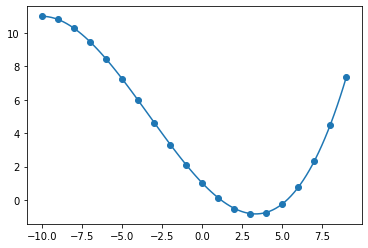

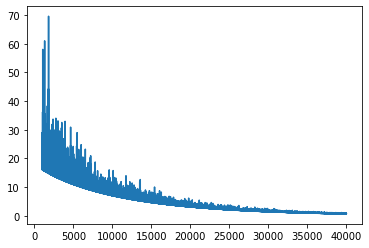

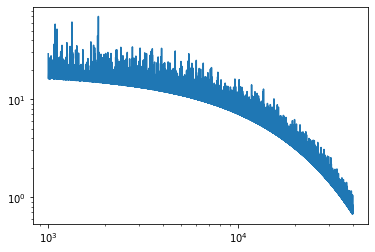

In [8]:
#Function Graph Statements
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = evSGDdb(np.array([1,1,1,1]), M, .00001, 10,200000, .1,2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],F(Z))
plt.plot(Z,V)
plt.show()

#Cost Graph Statement
S = np.size(P, axis = 0)
C = np.zeros(S)
for i in range(S):
    C[i] = cost(F(M[0]),M[1],P[i])
    
l = 1000
L = 40000
N = np.linspace(l,L,L-l)

plt.plot(N, C[l:L])
plt.show()

plt.loglog(N, C[l:L])
plt.show()

In [10]:
# normalize results? improvement in error divided by learning rate

# L_k_list: the sets of a to be selected from
# G_list: corresponding aggregated G values
# age_list: corresponding ages
# n: number of sets to be selected

# (1) what else to pass? grad_phi_list, L_k_list, (age)
# (2) long-term history of age across L
# (bonus) long-term history of age across different L_k's

# (bonus) multiple directions to step into & select best/avg
# (bonus) EA on a_0 with "SGD" - step in random directions in a-space, and assess best directions (via gradient) and evolve

def EA_selection(L_k_list, G_list, age_list, a_list, error_list, n):
    fitnesses = dict()
    mapping = dict()
    count = 0
    for L_k in L_k_list:
        fitness = EA_fitness(G_list[count], age_list[count], error_list[count])
        fitnesses[count] = fitness  # [L_k,age_k,a_k] combination maps to a fitness
        mapping[count] = [list(np.sort(L_k)), age_list[count], a_list[count]]
        count += 1
    fitnesses_sorted = dict(sorted(fitnesses.items(), key=lambda item: item[1]))

    L_k_list_to_return = []
    age_list_to_return = []
    a_list_to_return = []
    count = 0
    for index in fitnesses_sorted.keys():
        count += 1
        if not mapping[index][0] in L_k_list_to_return:
            L_k_list_to_return.append(mapping[index][0])
            age_list_to_return.append(mapping[index][1] + 1)
            a_list_to_return.append(mapping[index][2])
        if len(L_k_list_to_return) > n - 1:
            break
    return [L_k_list_to_return, age_list_to_return, a_list_to_return]


def EA_breed(parent_vals, age_vals, a_vals, L_max, split, num_children):
    parent_count = len(parent_vals)
    n = 0.1  # n is the number of parameters to mutate - 10% of points?
    children = []
    updated_population = parent_vals.copy()
    count = 0
    for i in range(parent_count):
        parent_vals[i] = list(parent_vals[i])
    for child in range(num_children):
        baby = parent_vals[0]  # not elegant - is needed to enter loop for first time
        while list(np.sort(baby)) in parent_vals:
            parent1_index = np.random.randint(parent_count)
            parent1 = parent_vals[parent1_index]
            decider = np.random.randn()
            # randomly choose between recombination+mutation or just mutation (weigh towards recombination+mutation)
            if decider > 0.2:
                # i.e. if recombination + mutation
                parent2 = parent_vals[np.random.randint(parent_count)]
                while list(parent1) == list(parent2):
                    # in case self-pollination
                    parent2 = parent_vals[np.random.randint(parent_count)]
                baby = recombine(parent1, parent2, split)
            else:
                # i.e. if only mutation
                baby = parent1
            baby = mutate(baby, L_max)
        count += 1
        updated_population.append(baby)
        age_vals.append(0)
        a_vals.append(a_vals[parent1_index])

    return [updated_population, age_vals, a_vals]


def recombine(parent1, parent2, split):
    # 70% from parent1 & 30% from parent2? can tweak as hyperparameter
    # need to see if lists or numpy arrays work better here
    baby = parent1.copy()
    intersection = set(parent1) & set(parent2)

    parent1_only = list(set(parent1) - intersection)
    parent2_only = list(set(parent2) - intersection)
    intersection = list(intersection)

    # SHOULD SHUFFLE LISTS HERE
    np.random.shuffle(parent1_only)
    np.random.shuffle(parent2_only)
    np.random.shuffle(intersection)

    K = len(parent1)
    intersection_count = 0
    parent2_count = 0
    for i in range(K):
        if i < int(split * K) - 1:
            # take from parent1_only until exhausted, then take from intersection
            if i < len(parent1_only):
                baby[i] = parent1_only[i]
            else:
                baby[i] = intersection[intersection_count]
                intersection_count += 1
        else:
            # take from parent2_only until exhausted, then take from intersection
            if parent2_count < len(parent2_only):
                baby[i] = parent2_only[parent2_count]
                parent2_count += 1
            else:
                baby[i] = intersection[intersection_count]
                intersection_count += 1
    return np.sort(baby)


# needs additional parameter? for size of original input data
def mutate(parent, max):
    dimension_to_replace = np.random.choice(parent)
    index = list(parent).index(dimension_to_replace)
    rand_replacement = np.random.randint(max)  # (max+1) vs (max) depends on indexing
    while rand_replacement in parent:
        rand_replacement = np.random.randint(max)  # same as above comment
    parent[index] = rand_replacement
    return np.sort(parent)


# very basic - maybe should incorporate abs(sum(phi's)) as well
def EA_fitness(G_vector, error, age):
    age_cutoff = 5
    if age < age_cutoff:
        factor = 1
    else:
        factor = 1 / (age - (age_cutoff - 1))
    return np.linalg.norm(G_vector) * factor / (error + 1)


# Given phi loss function above
# Local Gradient
def EA_grad_phi(a, x, y):
    error = (f(a, x) - y)
    grad = 2 * error * grad_f(a, x)
    return [grad, error]

In [11]:
def EA_selection_singlea(L_k_list, G_list, age_list, error_list, n):
    fitnesses = dict()
    mapping = dict()
    count = 0
    for L_k in L_k_list:
        fitness = EA_fitness(G_list[count], age_list[count], error_list[count])
        fitnesses[count] = fitness  # [L_k,age_k,a_k] combination maps to a fitness
        mapping[count] = [list(np.sort(L_k)), age_list[count], G_list[count]]
        count += 1
    fitnesses_sorted = dict(sorted(fitnesses.items(), key=lambda item: item[1]))

    L_k_list_to_return = []
    age_list_to_return = []
    G_list_to_return = []
    count = 0
    for index in fitnesses_sorted.keys():
        count += 1
        if not mapping[index][0] in L_k_list_to_return:
            L_k_list_to_return.append(mapping[index][0])
            age_list_to_return.append(mapping[index][1] + 1)
            G_list_to_return.append(mapping[index][2])
        if len(L_k_list_to_return) > n - 1:
            break
    return [L_k_list_to_return, age_list_to_return, G_list_to_return]


def EA_breed_singlea(parent_vals, age_vals, L_max, split, num_children):
    parent_count = len(parent_vals)
    n = 0.1  # n is the number of parameters to mutate - 10% of points?
    children = []
    updated_population = parent_vals.copy()
    count = 0
    for i in range(parent_count):
        parent_vals[i] = list(parent_vals[i])
    for child in range(num_children):
        baby = parent_vals[0]  # not elegant - is needed to enter loop for first time
        while list(np.sort(baby)) in parent_vals:
            parent1_index = np.random.randint(parent_count)
            parent1 = parent_vals[parent1_index]
            decider = np.random.randn()
            # randomly choose between recombination+mutation or just mutation (weigh towards recombination+mutation)
            if decider > 0.2:
                # i.e. if recombination + mutation
                parent2 = parent_vals[np.random.randint(parent_count)]
                while list(parent1) == list(parent2):
                    # in case self-pollination
                    parent2 = parent_vals[np.random.randint(parent_count)]
                baby = recombine(parent1, parent2, split)
            else:
                # i.e. if only mutation
                baby = parent1
            baby = mutate(baby, L_max)
        count += 1
        updated_population.append(baby)
        age_vals.append(0)

    return [updated_population, age_vals]

In [12]:
#### YOUSEF'S MODIFIED VERSION

# Evolutionary Algorithm x Stochastic Gradient Descent

#INPUTS:
#a0: initial guess for parameters a (can be randomly assigned or zero vector)
#C: coordinate data [x,y] x grouped and y grouped
#K: size of stochastic subset of data to gradient-step in
#eta: learning-rate/stepping size
#num: number of iterations/steps (need to account for size of population for fair comparison)
#pop_size: number of members for the evolving population
#recombination_split: split of genetic material to be acquired from either parent (e.g. 0.7 means 70% of genes from parent 1, 30% from parent 2)
#p: eta decay parameter

#OUTPUT:

def EA_SGDdb(a0, C, eta, K, num, pop_size, recombination_split, p):
    # size of Operator
    m = np.size(C, 1)
    n = np.size(a0)


    X = F(C[0]) #NEW

    # record best parameter set (in memory for easy access)
    A = np.ndarray((num, n))

    # record params for a member until it dies (only keep for current step and immediate past step)
    current_a_vals = []
    past_a_vals = []
    best_a = []
    min_error = 10000000

    for a_i in range(pop_size):
        current_a_vals.append(a0.copy())

    # indices
    L = [i for i in range(m)]

    # initialize members of population (subset choices) & age list (all start at zero)
    L_k_list = []
    age_list = []
    for L_k_i in range(pop_size):
        L_k_list.append(np.sort(rand_subset(L, K)))
        age_list.append(0)

    for l in range(1, num):
        # reset G list, error list, and past_a list
        current_G_vals = []
        error_vals = []
        past_a_vals = current_a_vals.copy()

        # loop updating new 'a' value
        a_index = 0
        for L_k in L_k_list:
            G = np.zeros(n)
            error = 0
            for j in L_k:
                grad_out = EA_grad_phi(current_a_vals[a_index], X[:,j], C[1][j])
                G = G + grad_out[0]
                error = error + abs(grad_out[1])
            current_G_vals.append(G.copy())
            error_vals.append(error)
            if error < min_error:
                min_error = error
                best_a = current_a_vals[a_index].copy()
            current_a_vals[a_index] = current_a_vals[a_index] - eta * G/(K * (l**p))
            a_index += 1

        # returns index of a with minimum error (could be used for metrics)
        best_index = error_vals.index(min(error_vals))
        A[l] = past_a_vals[best_index]

        # evolving the population before next iteration - ages, G values, L_k list, a sets passed as parameters to selection
        num_selected = int(K / 2)
        if l == 0.8 * num:
            l
        selected = EA_selection(L_k_list, current_G_vals, age_list, current_a_vals, error_vals,
                                num_selected)  # need to define num_selected - number of selected members
        selected_L_k = selected[0]
        selected_ages = selected[1]
        selected_a = selected[2]

        after_breeding = EA_breed(selected_L_k, selected_ages, selected_a, m - 1, recombination_split,
                                  pop_size - len(selected_L_k))
        L_k_list = after_breeding[0]
        age_list = after_breeding[1]
        current_a_vals = after_breeding[2]


    after_breeding

    return A, best_a


In [13]:
def EA_SGD_singleadb(a0, C, eta, K, num, pop_size, recombination_split, p):
    # size of Operator
    m = np.size(C, 1)
    n = np.size(a0)
    X = F(C[0]) #NEW    

    # record best parameter set (in memory for easy access)
    A = np.ndarray((num, n))
    A[0] = a0

    # indices
    L = [i for i in range(m)]

    # initialize members of population (subset choices) & age list (all start at zero)
    L_k_list = []
    age_list = []
    for L_k_i in range(pop_size):
        L_k_list.append(np.sort(rand_subset(L, K)))
        age_list.append(0)

    for l in range(1, num):
        # reset G list, error list, and past_a list
        current_G_vals = []
        error_vals = []

        # loop updating new 'a' value
        a_index = 0
        for L_k in L_k_list:
            G = np.zeros(n)
            error = 0
            for j in L_k:
                grad_out = EA_grad_phi(A[l - 1], X[:,j], C[1][j])
                G = G + grad_out[0]
                error = error + abs(grad_out[1])
            current_G_vals.append(G.copy())
            error_vals.append(error)  # not sure whether list holds references or updated errors - if troubleshooting pay attn here

            a_index += 1

        # evolving the population before next iteration - ages, G values, L_k list, a sets passed as parameters to selection
        num_selected = int(K / 2)
        if l == 0.8 * num:
            l

        selected = EA_selection_singlea(L_k_list, current_G_vals, age_list, error_vals, num_selected)
        selected_L_k = selected[0]
        selected_ages = selected[1]
        selected_G = selected[2]

        after_breeding = EA_breed_singlea(selected_L_k, selected_ages, m - 1, recombination_split,
                                          pop_size - len(selected_L_k))
        L_k_list = after_breeding[0]
        age_list = after_breeding[1]
        avg_G = 0
        for g in selected_G:
            avg_G += g
        avg_G = avg_G/len(selected_G)
        A[l] = A[l - 1] - eta * avg_G / (K * (l ** p))

        if l % 10 == 0:
            l

    after_breeding

    return A

In [14]:
import time

def test_EASGD(C,num,pop_size,choice):
    start = time.time()
    a0 = np.array([1, 1, 1, 1])
    a_true = np.array([1,2,0.5,-0.3])
    #a_true = np.array([1,-1,0.1,0.01])
    num_points = 40
    K = 10
    if choice==1:
        # eta = 0.000024
        # p = 0.23
        #eta = 0.000016
        #p = 0.17
        eta = 0.000009
        p = 0.07
        A = EA_SGDdb(a0, C, eta, K, num, pop_size,0.7,p)  # 423s for 100,000x10 - best a: [0.88,1.66,0.49,0.2]
    elif choice==2:
        eta = 0.00000015
        p = 0
        # eta = 0.0000081
        # p = 0.02
        # eta = 0.000016
        # p = 0.17
        A = EA_SGD_singleadb(a0, C, eta, K, num, pop_size,0.7,p)  # 423s for 100,000x10 - best a: [0.88,1.66,0.49,0.2]
    elif choice==3:
        #eta = 0.0000009
        #p = 0
        eta = 0.0000081
        p = 0.07
        A = evSGDdb(a0,C,eta,K,num,p,5) #247s for 1,000,000 - best a: [0.71,1.99,0.48,0.2]
    else:
        eta = 0.0000081
        p = 0.07
        A = SGDdb(a0,C,eta,K,num,p)


    return A


In [38]:
EA_SGD_results_1m = []
EA_SGDsinglea_results_1m = []
evSGD_results_1m = []
SGD_results_1m = []

a_true = np.array([1, -1, 0.1, 0.01])#([1,2,0.5,-0.3])

M = Y(a=a_true,x=np.array([((20/40)*i-10) for i in range(40)]), s = 0, norm = False)

for i in range(5):
    np.random.seed(i)
    EA_SGD_results_1m.append(test_EASGD(M,1000000,4,1)[0])
    EA_SGDsinglea_results_1m.append(test_EASGD(M,1000000,4,2))
    evSGD_results_1m.append(test_EASGD(M,1000000,4,3))
    SGD_results_1m.append(test_EASGD(M,1000000,4,4))
    print('finished loop iteration',i)

Gradient: [0.000985 0.000079 0.004376 -0.075061]
Gradient: [-6.864394 49.580241 -285.089833 2127.247220]
finished loop iteration 0
Gradient: [0.000820 0.000229 0.006163 0.001379]
Gradient: [-5.834967 29.742586 -114.504820 679.470829]
finished loop iteration 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in subtract


Gradient: [0.000611 0.000842 0.003804 0.008440]
Gradient: [1.010238 -19.173660 117.843476 -2701.293559]
finished loop iteration 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in subtract


Gradient: [0.000317 -0.000621 -0.002682 -0.061260]
Gradient: [-5.491935 17.800328 -164.944759 76.279413]
finished loop iteration 3
Gradient: [0.001090 0.000770 0.005405 0.037686]
Gradient: [0.459830 5.169294 140.422220 -1074.607228]
finished loop iteration 4


In [ ]:
EA_SGD_avg = []
EA_SGD_std = []
for i in range(1000000):
    a1 = [EA_SGD_results_1m[0][i][0],EA_SGD_results_1m[1][i][0],EA_SGD_results_1m[2][i][0],EA_SGD_results_1m[3][i][0],EA_SGD_results_1m[4][i][0]]
    a2 = [EA_SGD_results_1m[0][i][1],EA_SGD_results_1m[1][i][1],EA_SGD_results_1m[2][i][1],EA_SGD_results_1m[3][i][1],EA_SGD_results_1m[4][i][1]]
    a3 = [EA_SGD_results_1m[0][i][2],EA_SGD_results_1m[1][i][2],EA_SGD_results_1m[2][i][2],EA_SGD_results_1m[3][i][2],EA_SGD_results_1m[4][i][2]]
    a4 = [EA_SGD_results_1m[0][i][3],EA_SGD_results_1m[1][i][3],EA_SGD_results_1m[2][i][3],EA_SGD_results_1m[3][i][3],EA_SGD_results_1m[4][i][3]]
    EA_SGD_avg.append([np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4)])
    EA_SGD_std.append([np.std(a1),np.std(a2),np.std(a3),np.std(a4)])
    if i%100000==0:
        print('iteration ', i)

In [83]:
evSGD_avg = []
evSGD_std = []
for i in range(1000000):
    a1 = [evSGD_results_1m[0][i][0],evSGD_results_1m[1][i][0],evSGD_results_1m[2][i][0],evSGD_results_1m[3][i][0],evSGD_results_1m[4][i][0]]
    a2 = [evSGD_results_1m[0][i][1],evSGD_results_1m[1][i][1],evSGD_results_1m[2][i][1],evSGD_results_1m[3][i][1],evSGD_results_1m[4][i][1]]
    a3 = [evSGD_results_1m[0][i][2],evSGD_results_1m[1][i][2],evSGD_results_1m[2][i][2],evSGD_results_1m[3][i][2],evSGD_results_1m[4][i][2]]
    a4 = [evSGD_results_1m[0][i][3],evSGD_results_1m[1][i][3],evSGD_results_1m[2][i][3],evSGD_results_1m[3][i][3],evSGD_results_1m[4][i][3]]
    evSGD_avg.append([np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4)])
    evSGD_std.append([np.std(a1),np.std(a2),np.std(a3),np.std(a4)])
    if i%100000==0:
        print('iteration ', i)


iteration  0
iteration  100000
iteration  200000
iteration  300000
iteration  400000
iteration  500000
iteration  600000
iteration  700000
iteration  800000
iteration  900000


In [84]:
SGD_avg = []
SGD_std = []
for i in range(1000000):
    a1 = [SGD_results_1m[0][i][0],SGD_results_1m[1][i][0],SGD_results_1m[2][i][0],SGD_results_1m[3][i][0],SGD_results_1m[4][i][0]]
    a2 = [SGD_results_1m[0][i][1],SGD_results_1m[1][i][1],SGD_results_1m[2][i][1],SGD_results_1m[3][i][1],SGD_results_1m[4][i][1]]
    a3 = [SGD_results_1m[0][i][2],SGD_results_1m[1][i][2],SGD_results_1m[2][i][2],SGD_results_1m[3][i][2],SGD_results_1m[4][i][2]]
    a4 = [SGD_results_1m[0][i][3],SGD_results_1m[1][i][3],SGD_results_1m[2][i][3],SGD_results_1m[3][i][3],SGD_results_1m[4][i][3]]
    SGD_avg.append([np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4)])
    SGD_std.append([np.std(a1),np.std(a2),np.std(a3),np.std(a4)])
    if i%100000==0:
        print('iteration ', i)

iteration  0
iteration  100000
iteration  200000
iteration  300000
iteration  400000
iteration  500000
iteration  600000
iteration  700000
iteration  800000
iteration  900000


In [128]:
EA_SGDsa_avg = []
#EA_SGDsa_std = []
for i in range(1000000):
    a1 = [EA_SGDsinglea_results_1m[3][i][0],EA_SGDsinglea_results_1m[4][i][0]]
    a2 = [EA_SGDsinglea_results_1m[3][i][1],EA_SGDsinglea_results_1m[4][i][1]]
    a3 = [EA_SGDsinglea_results_1m[3][i][2],EA_SGDsinglea_results_1m[4][i][2]]
    a4 = [EA_SGDsinglea_results_1m[3][i][3],EA_SGDsinglea_results_1m[4][i][3]]
    EA_SGDsa_avg.append([np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4)])
    #EA_SGDsa_std.append([np.std(a1),np.std(a2),np.std(a3),np.std(a4)])
    if i%100000==0:
        print('iteration ', i)

iteration  0
iteration  100000
iteration  200000
iteration  300000
iteration  400000
iteration  500000
iteration  600000
iteration  700000
iteration  800000
iteration  900000


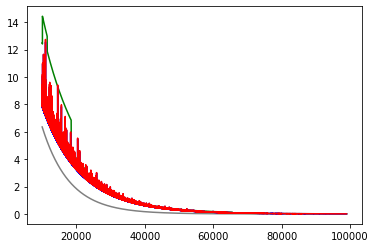

In [190]:
# #plot cost
S = np.size(EA_SGD_ma, axis = 0)

C = np.zeros(S)
K = np.zeros(S)
CK = np.zeros(S)
KC = np.zeros(S)

for i in range(S):
    C[i] = cost(F(M[0]),M[1],EA_SGD_avg[i])
    K[i] = cost(F(M[0]),M[1],EA_SGDsa_avg[i])
    CK[i] = cost(F(M[0]),M[1],evSGD_avg[i])
    KC[i] = cost(F(M[0]),M[1],SGD_avg[i])
    
l = 10000
L = 99000
N = np.linspace(l,L,L-l)

plt.plot(N, C[l:L],color='green')
plt.plot(N, K[l:L],color='grey')
plt.plot(N, KC[l:L],color='blue')
plt.plot(N, CK[l:L],color='red')
plt.show()

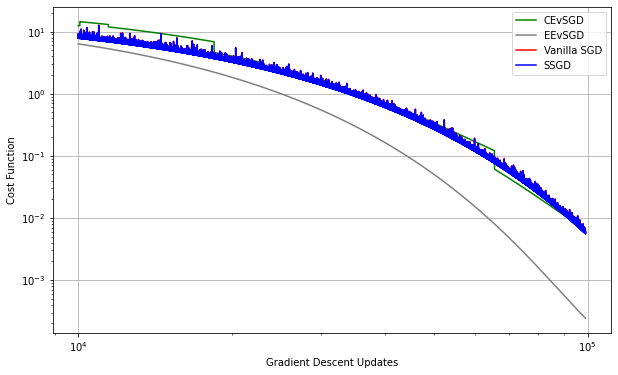

In [295]:
l = 10000
L = 99000
N = np.linspace(l,L,L-l)

plt.figure(figsize=[10,6])
plt.loglog(N, C[l:L],color='green')
plt.loglog(N, K[l:L],color='grey')
plt.loglog(N, CK[l:L],color='red')
plt.loglog(N, KC[l:L],color='blue')
plt.ylabel('Cost Function')
plt.xlabel('Gradient Descent Updates')
plt.grid(which='major')
plt.legend(['CEvSGD', 'EEvSGD','Vanilla SGD','SSGD'])
plt.show()

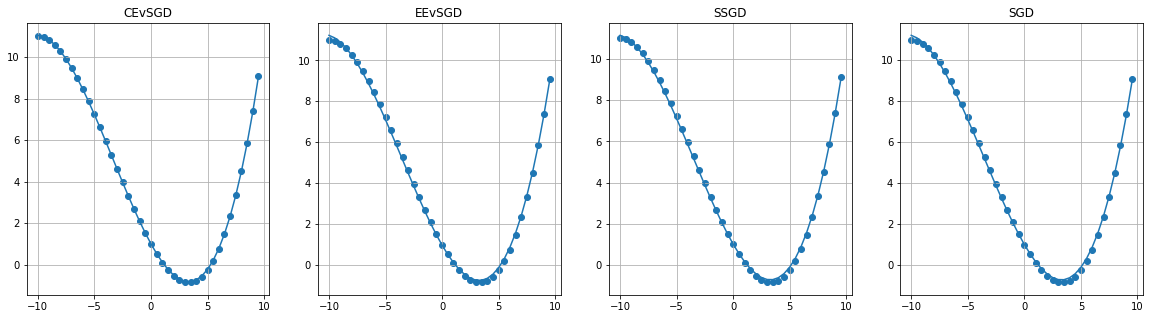

In [292]:
from matplotlib.pyplot import figure

#Plot Descent Model over Data

t = 90000 # TOGGLE TO CHANGE STEP AT WHICH MODELS ARE LIFTED

Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})

fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot2grid((1,4), (0,0),)
ax2 = plt.subplot2grid((1,4), (0,1),)
ax3 = plt.subplot2grid((1,4), (0,2),)
ax4 = plt.subplot2grid((1,4), (0,3),)

cevsgd = f(EA_SGDsa_avg[t],F(M[0]))
eevsgd = f(EA_SGD_avg[t],F(M[0]))
ssgd = f(evSGD_avg[t],F(M[0]))
sgd = f(SGD_avg[t],F(M[0]))

ax1.scatter(M[0],M[1])
ax1.plot(M[0],cevsgd)
ax1.grid(which='major')
ax1.title.set_text('CEvSGD')
ax2.scatter(M[0],M[1])
ax2.plot(M[0],eevsgd)
ax2.grid(which='major')
ax2.title.set_text('EEvSGD')
ax3.scatter(M[0],M[1])
ax3.plot(M[0],ssgd)
ax3.grid(which='major')
ax3.title.set_text('SSGD')
ax4.scatter(M[0],M[1])
ax4.plot(M[0],sgd)
ax4.title.set_text('SGD')
ax4.grid(which='major')


# plt.text(-43.5, 13, 'At 30k steps',fontdict=titlefont)
plt.show()

In [40]:
eta = 0.000008
a_true = np.array([1,-1,0.1,0.01])

M2 = Y(a=a_true,x=np.array([((20/40)*i-10) for i in range(40)]), s = 0, norm = False)

#p0 = evSGDdb(a0,M2,eta,K,100000,0.00,5)
p1 = evSGDdb(a0,M2,0.00001,K,100000,0.07,5)
p2 = evSGDdb(a0,M2,0.000011,K,100000,0.07,5)
p3 = evSGDdb(a0,M2,0.00002,K,100000,0.07,5)


Gradient: [0.005171 0.675189 2.130525 -5.839516]
Gradient: [0.006804 0.487951 -0.438524 13.673120]
Gradient: [-0.513689 -0.461411 -4.043019 -4.628315]


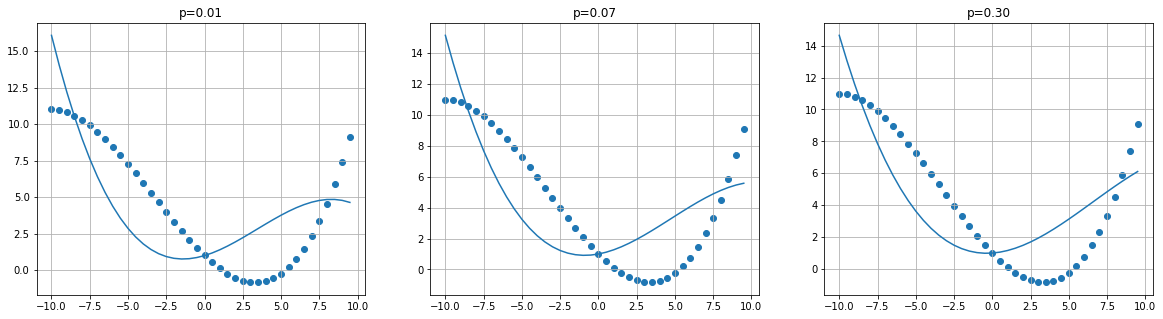

In [37]:
from matplotlib.pyplot import figure

#Plot Descent Model over Data

t = 99999 # TOGGLE TO CHANGE STEP AT WHICH MODELS ARE LIFTED

Z = np.linspace(np.amin(M2[0]),np.max(M[0]),100)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})

fig = plt.figure(figsize=(20,5))
#ax1 = plt.subplot2grid((1,4), (0,0),)
ax2 = plt.subplot2grid((1,3), (0,0),)
ax3 = plt.subplot2grid((1,3), (0,1),)
ax4 = plt.subplot2grid((1,3), (0,2),)

#p00 = f(p0[t],F(M2[0]))
p01 = f(p1[t],F(M2[0]))
p07 = f(p2[t],F(M2[0]))
p30 = f(p3[t],F(M2[0]))

# ax1.scatter(M2[0],M2[1])
# ax1.plot(M2[0],p00)
# ax1.grid(which='major')
# ax1.title.set_text('p=0')
ax2.scatter(M2[0],M2[1])
ax2.plot(M2[0],p01)
ax2.grid(which='major')
ax2.title.set_text('p=0.01')
ax3.scatter(M2[0],M2[1])
ax3.plot(M2[0],p07)
ax3.grid(which='major')
ax3.title.set_text('p=0.07')
ax4.scatter(M2[0],M2[1])
ax4.plot(M2[0],p30)
ax4.title.set_text('p=0.30')
ax4.grid(which='major')


#plt.text(-43.5, 13, 'At 30k steps',fontdict=titlefont)
plt.show()

In [53]:
# assess runtimes

import time

SSGD_time = time.time()
for i in range(5):
    SSGD = test_EASGD(M1,100000,4,3)
SSGD_time = time.time() - SSGD_time

EEvSGD_time = time.time()
for i in range(5):
    EEvSGD = test_EASGD(M1,100000,4,1)
EEvSGD_time = time.time() - EEvSGD_time

CEvSGD_time = time.time()
for i in range(5):
    CEvSGD = test_EASGD(M1,100000,4,2)
CEvSGD_time = time.time() - CEvSGD_time

SGD_time = time.time()
for i in range(5):
    SGD = test_EASGD(M1,100000,4,4)
SGD_time = time.time() - SGD_time

Gradient: [-0.024129 0.158854 2.962693 26.012203]
Gradient: [0.038414 -0.247967 1.478372 -7.200772]
Gradient: [-0.019613 -0.383736 -0.633649 -12.311667]
Gradient: [-0.022900 -0.209670 -0.321956 -1.489654]
Gradient: [-0.041477 -0.381358 -0.609167 -12.026389]


In [54]:
[SSGD_time, EEvSGD_time, CEvSGD_time, SGD_time]

[153.60080242156982, 193.1731264591217, 194.196453332901, 63.68984627723694]